# Jonathan Halverson
# Friday, February 24, 2017
# Part 6: Finishes and matplotlib colors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')
#plt.style.use('classic')
from scipy.stats import chi2_contingency

### Now using Matplotlib version 2

In [2]:
import matplotlib as mpl
mpl.get_configdir()

u'/Users/jhalverson/.matplotlib'

In [3]:
plt.rcParams['xtick.labelsize'], plt.rcParams['axes.labelsize'], plt.rcParams['figure.figsize'], plt.rcParams['figure.dpi']

(12.0, 14.0, [6.0, 3.708], 100.0)

In [4]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'halverson', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


### Load data

In [5]:
iofile = 'data/fightmetric_cards/fightmetric_fights_CLEAN_3-6-2017.csv'
fights = pd.read_csv(iofile, header=0, parse_dates=['Date'])
iofile = 'data/fightmetric_fighters_with_corrections_from_UFC_Wikipedia_CLEAN.csv'
fighters = pd.read_csv(iofile, header=0, parse_dates=['Dob'])
fighters['Age'] = (pd.to_datetime('today') - fighters.Dob) / np.timedelta64(1, 'Y')
cols = ['Name', 'Height', 'Reach', 'LegReach', 'Stance', 'Dob', 'Age']
df = fights.merge(fighters[cols], how='left', left_on='Winner', right_on='Name')
df = df.merge(fighters[cols], how='left', left_on='Loser', right_on='Name', suffixes=('', '_L'))
df.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,...,Stance,Dob,Age,Name_L,Height_L,Reach_L,LegReach_L,Stance_L,Dob_L,Age_L
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,Orthodox,1984-04-24,32.912380,Holly Holm,68.0,69.0,38.0,Southpaw,1981-10-17,35.431255
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,Southpaw,1975-04-14,41.941997,Derek Brunson,73.0,77.0,43.0,Southpaw,1984-01-04,33.216288
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,...,Orthodox,1979-12-07,37.293031,Tim Boetsch,72.0,74.0,42.0,Orthodox,1981-01-28,36.148586


### Let's consider a subset of the data:

In [6]:
cols = ['Winner', 'Loser', 'Method', 'Round', 'Time', 'Date']
finishes = df[df.Method.isin(['KO/TKO', 'SUB']) & (df.Date > np.datetime64('2005-01-01'))][cols]
finishes.head(5)

,Winner,Loser,Method,Round,Time,Date
2,Jacare Souza,Tim Boetsch,SUB,1,3:41,2017-02-11
10,Chan Sung Jung,Dennis Bermudez,KO/TKO,1,2:49,2017-02-04
12,James Vick,Abel Trujillo,SUB,3,0:49,2017-02-04
14,Marcel Fortuna,Anthony Hamilton,KO/TKO,1,3:10,2017-02-04
16,Curtis Blaydes,Adam Milstead,KO/TKO,2,0:59,2017-02-04


### How many fights are in the subset?

In [7]:
finishes.shape[0]

1935

### Was is the breakdown by round?

In [8]:
method_round = pd.crosstab(index=finishes.Method, columns=finishes.Round, margins=False)
method_round

Round,1,2,3,4,5
Method,,,,,
KO/TKO,661,350,156,11,6
SUB,372,242,123,8,6


In [9]:
method_round / method_round.sum(axis=0)

Round,1,2,3,4,5
Method,,,,,
KO/TKO,0.639884,0.591216,0.55914,0.578947,0.5
SUB,0.360116,0.408784,0.44086,0.421053,0.5


Note that the previous table implies that there have only been 12 finishes in the 5th round since 2005. Let's look at these fights:

### What is the proportion of each finishing method for each round?

In [10]:
tko = finishes[finishes.Method == 'KO/TKO'].Round.value_counts()
sub = finishes[finishes.Method == 'SUB'].Round.value_counts()
tko_p = 100.0 * tko / (tko + sub)
sub_p = 100.0 * sub / (tko + sub)

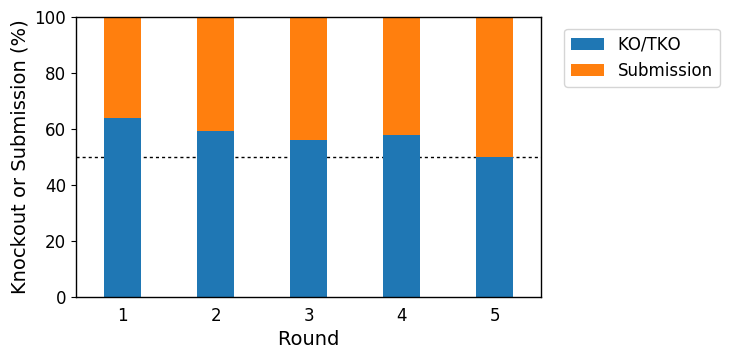

In [68]:
fig, ax = plt.subplots()
plt.plot([-0.5, 4.5], [50, 50], 'k:', zorder=0)
plt.bar(range(5), tko_p, width=0.4, tick_label=[1, 2, 3, 4, 5], align='center', label='KO/TKO')
plt.bar(range(5), sub_p, width=0.4, bottom=tko_p, align='center', label='Submission')
plt.xlim(-0.5, 4.5)
plt.ylim(0, 100)
plt.legend(loc=(1.05, 0.75), fontsize=12)
ax.xaxis.set_ticks_position('none')
plt.xlabel('Round')
plt.ylabel('Knockout or Submission (%)')
plt.savefig('report/finishes/tko_sub_by_round.pdf', bbox_inches='tight')

Are the result statistically significant?

In [12]:
chi_sq, p_value, dof, expect = chi2_contingency(method_round)
chi_sq, p_value, dof, p_value > 0.05

(8.4626907347192031, 0.076026228837602738, 4, True)

### What are the latest finishes in UFC history?

In [13]:
fifth_finish = df[df.Method.isin(['KO/TKO', 'SUB']) & (df.Round == 5)].reset_index(drop=True)
fifth_finish = fifth_finish[['Winner', 'Loser', 'Method', 'Round', 'Time', 'Event','Date']]
fifth_finish.index = range(1, 14)
fifth_finish.to_latex('report/finishes/late_finishes_RAW.tex')
fifth_finish

,Winner,Loser,Method,Round,Time,Event,Date
1,Miesha Tate,Holly Holm,SUB,5,3:30,UFC 196: McGregor vs Diaz,2016-03-05
2,Rose Namajunas,Paige VanZant,SUB,5,2:25,UFC Fight Night: Namajunas vs. VanZant,2015-12-10
3,Robbie Lawler,Rory MacDonald,KO/TKO,5,1:00,UFC 189: Mendes vs McGregor,2015-07-11
4,Stipe Miocic,Mark Hunt,KO/TKO,5,2:47,UFC Fight Night: Miocic vs Hunt,2015-05-09
5,Demetrious Johnson,Kyoji Horiguchi,SUB,5,4:59,UFC 186: Johnson vs Horiguchi,2015-04-25
6,Frankie Edgar,Cub Swanson,SUB,5,4:56,UFC Fight Night: Edgar vs Swanson,2014-11-22
7,TJ Dillashaw,Joe Soto,KO/TKO,5,2:20,UFC 177: Dillashaw vs Soto,2014-08-30
8,TJ Dillashaw,Renan Barao,KO/TKO,5,2:26,UFC 173: Barao vs Dillashaw,2014-05-24
9,Cain Velasquez,Junior Dos Santos,KO/TKO,5,3:09,UFC 166: Velasquez vs Dos Santos 3,2013-10-19
10,Demetrious Johnson,John Moraga,SUB,5,3:43,UFC on Fox: Johnson vs Moraga,2013-07-27


We see that the null hypotheis should be not be rejected in favor of the alternative. There is not enough evidence to conclude that there is a decreasing trend with round number.

### How are wins earned by weight class?

In [14]:
df.WeightClass.value_counts()

Lightweight              827
Welterweight             789
Middleweight             621
Heavyweight              426
Light Heavyweight        402
Featherweight            320
Bantamweight             261
Flyweight                131
Open Weight              125
Women's Bantamweight      76
Women's Strawweight       68
Catch Weight              19
Women's Featherweight      1
Women's Flyweight          1
Super Heavyweight          1
Name: WeightClass, dtype: int64

In [15]:
df.Outcome.value_counts()

def.          3999
no contest      42
draw            27
Name: Outcome, dtype: int64

In [16]:
df.Method.value_counts()

KO/TKO        1384
U-DEC         1329
SUB            888
S-DEC          368
M-DEC           43
Overturned      30
CNC             12
DQ              12
Other            2
Name: Method, dtype: int64

In [117]:
wc = ["Women's Strawweight", "Women's Bantamweight", 'Flyweight', 'Bantamweight', 'Featherweight',
     'Lightweight', 'Welterweight', 'Middleweight', 'Light Heavyweight', 'Heavyweight']

af = df[(df.Date > np.datetime64('2005-01-01')) & (df.Outcome == 'def.') & df.WeightClass.isin(wc)].copy()
af.Method = af.Method.replace({'M-DEC':'DEC', 'S-DEC':'DEC', 'U-DEC':'DEC'})

weight_method = pd.crosstab(index=af["Method"], columns=af["WeightClass"], margins=True)
weight_method = weight_method.T.reindex(wc + ['All'])
weight_method.columns = ["Decision", "Opponent DQ", "TKO/KO", "Submission", "Total"]
weight_method = weight_method[["Decision", "TKO/KO", "Submission", "Opponent DQ", "Total"]]
weight_method

,Decision,TKO/KO,Submission,Opponent DQ,Total
WeightClass,,,,,
Women's Strawweight,44,6,18,0,68
Women's Bantamweight,40,22,13,0,75
Flyweight,80,27,22,0,129
Bantamweight,125,63,65,0,253
Featherweight,170,81,60,1,312
Lightweight,372,184,191,1,748
Welterweight,341,241,144,3,729
Middleweight,214,202,125,2,543
Light Heavyweight,140,159,66,2,367


Let's remove DQ and run a Chi-square test:

In [118]:
tmp_table = weight_method.iloc[0:-1,0:-2]
tmp_table

,Decision,TKO/KO,Submission
WeightClass,,,
Women's Strawweight,44,6,18
Women's Bantamweight,40,22,13
Flyweight,80,27,22
Bantamweight,125,63,65
Featherweight,170,81,60
Lightweight,372,184,191
Welterweight,341,241,144
Middleweight,214,202,125
Light Heavyweight,140,159,66


In [119]:
chi_sq, p_value, dof, expect = chi2_contingency(tmp_table)
print chi_sq, dof, p_value, p_value > 0.05

208.124719222 18 2.36315688261e-34 False


In [120]:
N = tmp_table.sum().sum()
V = (chi_sq / (N * min(tmp_table.shape[0] - 1, tmp_table.shape[1] - 1)))**0.5
V

0.17167141066647951

In [21]:
weight_method = weight_method.divide(weight_method.Total, axis=0).applymap(lambda x: round(100 * x, 1))
weight_method_str = weight_method.astype(str).applymap(lambda x: x + '%')
weight_method_str = weight_method_str[['TKO/KO', 'Submission', 'Decision', 'Opponent DQ', 'Total']]
weight_method_str.iloc[0:-1,0:-1].to_latex('report/finishes/finishes_by_weight_class_RAW.tex')
weight_method_str.iloc[0:-1,0:-1]

,TKO/KO,Submission,Decision,Opponent DQ
WeightClass,,,,
Women's Strawweight,8.8%,26.5%,64.7%,0.0%
Women's Bantamweight,29.3%,17.3%,53.3%,0.0%
Flyweight,20.9%,17.1%,62.0%,0.0%
Bantamweight,24.9%,25.7%,49.4%,0.0%
Featherweight,26.0%,19.2%,54.5%,0.3%
Lightweight,24.6%,25.5%,49.7%,0.1%
Welterweight,33.1%,19.8%,46.8%,0.4%
Middleweight,37.2%,23.0%,39.4%,0.4%
Light Heavyweight,43.3%,18.0%,38.1%,0.5%


In [22]:
weight_method = weight_method.drop('All')

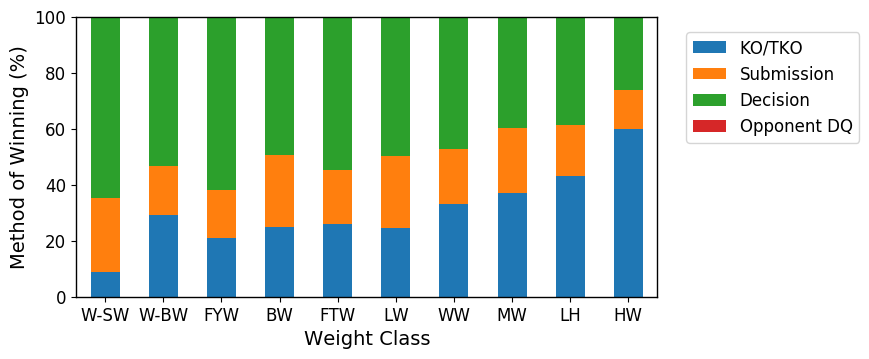

In [67]:
fig, ax = plt.subplots(figsize=(7.5, 3.708))
plt.bar(range(10), weight_method['TKO/KO'], width=0.5, tick_label=range(10), align='center', label='KO/TKO')
plt.bar(range(10), weight_method['Submission'], width=0.5, bottom=weight_method['TKO/KO'], align='center', label='Submission')
plt.bar(range(10), weight_method['Decision'], width=0.5, bottom=weight_method['Submission']+weight_method['TKO/KO'], align='center', label='Decision')
plt.bar(range(10), weight_method['Opponent DQ'], width=0.5, bottom=weight_method['Submission']+weight_method['TKO/KO']+weight_method['Decision'], align='center', label='Opponent DQ')
plt.xlim(-0.5, 9.5)
plt.ylim(0, 100)
plt.legend(loc=(1.05, 0.55), fontsize=12)
plt.xlabel('Weight Class')
plt.ylabel('Method of Winning (%)')
wlabels = ['W-SW', 'W-BW', 'FYW', 'BW', 'FTW', 'LW', 'WW', 'MW', 'LH', 'HW']
ax.set_xticklabels(wlabels)
#ax.xaxis.set_ticks_position('none')
plt.savefig('report/finishes/finishes_weight_class_bars.pdf', bbox_inches='tight')

### What round do heavyweight TKO/KO's happend?

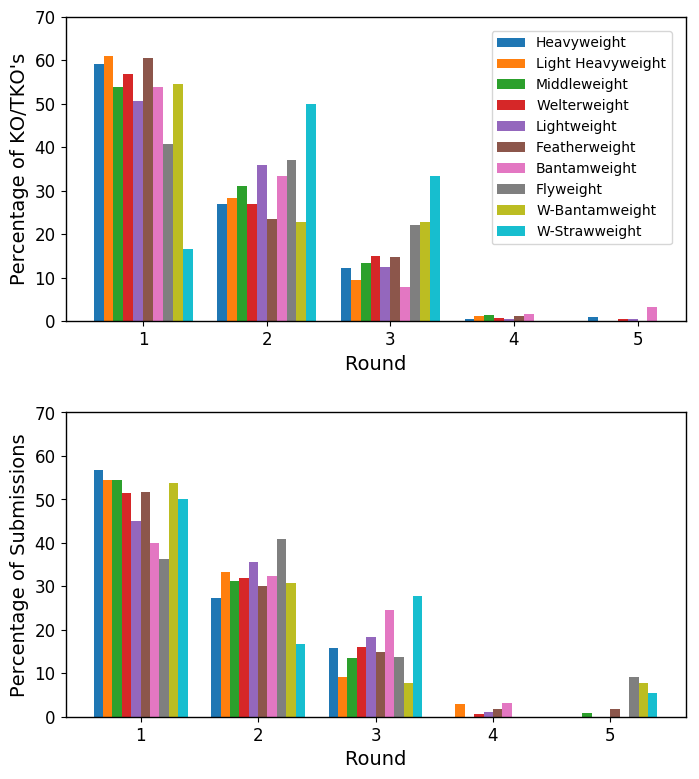

In [24]:
hf = df[(df.Date > np.datetime64('2005-01-01')) & (df.Method == 'KO/TKO')].copy()
for w in wc:
     w_class = w.lower().replace('women\'s', 'w').replace(' ', '_')
     exec('tmp = hf[hf.WeightClass =="' + w + '"]')
     exec(w_class + '_rnd = tmp.Round.value_counts() / tmp.Round.value_counts().sum()')

fac = 5
width_ = 0.4
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 2.5*3.708))
ax1.bar(fac * heavyweight_rnd.index,  100*heavyweight_rnd, width=width_, label='Heavyweight')
ax1.bar(fac * light_heavyweight_rnd.index+width_, 100*light_heavyweight_rnd, width=width_, label='Light Heavyweight')
ax1.bar(fac * middleweight_rnd.index+2*width_, 100*middleweight_rnd, width=width_, label='Middleweight')
ax1.bar(fac * welterweight_rnd.index+3*width_,  100*welterweight_rnd, width=width_, label='Welterweight')
ax1.bar(fac * lightweight_rnd.index+4*width_,  100*lightweight_rnd, width=width_, label='Lightweight')
ax1.bar(fac * featherweight_rnd.index+5*width_,  100*featherweight_rnd, width=width_, label='Featherweight')
ax1.bar(fac * bantamweight_rnd.index+6*width_,  100*bantamweight_rnd, width=width_, label='Bantamweight')
ax1.bar(fac * flyweight_rnd.index+7*width_,  100*flyweight_rnd, width=width_, label='Flyweight')
ax1.bar(fac * w_bantamweight_rnd.index+8*width_,  100*w_bantamweight_rnd, width=width_, label='W-Bantamweight')
ax1.bar(fac * w_strawweight_rnd.index+9*width_,  100*w_strawweight_rnd, width=width_, label='W-Strawweight')
major_ticks = fac * np.arange(1, 6) + 1.8
ax1.set_xticks(major_ticks)
ax1.set_xticklabels(range(1,6))
ax1.set_xlabel('Round')
ax1.set_ylabel("Percentage of KO/TKO's")
ax1.set_ylim(0, 70)
ax1.legend()

hf = df[(df.Date > np.datetime64('2005-01-01')) & (df.Method == 'SUB')].copy()
for w in wc:
     w_class = w.lower().replace('women\'s', 'w').replace(' ', '_')
     exec('tmp = hf[hf.WeightClass =="' + w + '"]')
     exec(w_class + '_rnd = tmp.Round.value_counts() / tmp.Round.value_counts().sum()')

ax2.bar(fac * heavyweight_rnd.index,  100*heavyweight_rnd, width=width_, label='Heavyweight')
ax2.bar(fac * light_heavyweight_rnd.index+width_, 100*light_heavyweight_rnd, width=width_, label='Light Heavyweight')
ax2.bar(fac * middleweight_rnd.index+2*width_, 100*middleweight_rnd, width=width_, label='Middleweight')
ax2.bar(fac * welterweight_rnd.index+3*width_,  100*welterweight_rnd, width=width_, label='Welterweight')
ax2.bar(fac * lightweight_rnd.index+4*width_,  100*lightweight_rnd, width=width_, label='Lightweight')
ax2.bar(fac * featherweight_rnd.index+5*width_,  100*featherweight_rnd, width=width_, label='Featherweight')
ax2.bar(fac * bantamweight_rnd.index+6*width_,  100*bantamweight_rnd, width=width_, label='Bantamweight')
ax2.bar(fac * flyweight_rnd.index+7*width_,  100*flyweight_rnd, width=width_, label='Flyweight')
ax2.bar(fac * w_bantamweight_rnd.index+8*width_,  100*w_bantamweight_rnd, width=width_, label='W-Bantamweight')
ax2.bar(fac * w_strawweight_rnd.index+9*width_,  100*w_strawweight_rnd, width=width_, label='W-Strawweight')
major_ticks = fac * np.arange(1, 6) + 1.8
ax2.set_xticks(major_ticks)
ax2.set_xticklabels(range(1,6))
ax2.set_xlabel('Round')
ax2.set_ylabel("Percentage of Submissions")
ax2.set_ylim(0, 70)
plt.subplots_adjust(hspace=0.3)
plt.savefig('report/finishes/submissions_tko_percentage.pdf', bbox_inches='tight')

# Outcomes by year

In [25]:
ko = fights[fights.Method.str.contains('KO')].Date.dt.year.value_counts()
sub = fights[fights.Method.str.contains('SUB')].Date.dt.year.value_counts()
dec = fights[fights.Method.str.contains('DEC')].Date.dt.year.value_counts()
other = fights[~fights.Method.str.contains('KO|SUB|DEC')].Date.dt.year.value_counts()

In [26]:
outcome_by_year = pd.DataFrame([ko, sub, dec, other]).T.fillna(0)
outcome_by_year.columns = ['KO/TKO', 'Submission', 'Decision', 'Other']
outcome_by_year['Total'] = outcome_by_year.sum(axis=1)
outcome_by_year

,KO/TKO,Submission,Decision,Other,Total
1993,3.0,5.0,0.0,0.0,8.0
1994,11.0,20.0,0.0,0.0,31.0
1995,15.0,20.0,3.0,2.0,40.0
1996,27.0,11.0,5.0,0.0,43.0
1997,13.0,19.0,8.0,1.0,41.0
1998,9.0,8.0,8.0,0.0,25.0
1999,26.0,7.0,11.0,0.0,44.0
2000,14.0,11.0,17.0,1.0,43.0
2001,17.0,9.0,12.0,2.0,40.0
2002,29.0,8.0,15.0,1.0,53.0


In [27]:
outcome_by_year.sum()

KO/TKO        1384.0
Submission     888.0
Decision      1740.0
Other           56.0
Total         4068.0
dtype: float64

Store list of the default colors:

In [111]:
clrs = plt.rcParams['axes.prop_cycle']
clrs = [color.values()[0] for color in list(clrs)]

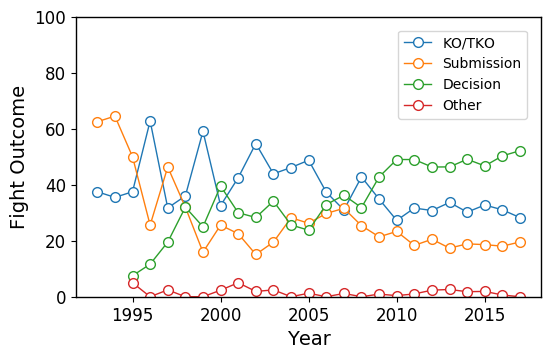

In [115]:
years = outcome_by_year.index
plt.plot(years, 100 * outcome_by_year['KO/TKO'] / outcome_by_year.Total, label='KO/TKO', marker='o', mec=clrs[0],  mfc='w')
plt.plot(years, 100 * outcome_by_year['Submission'] / outcome_by_year.Total, label='Submission', marker='o', mec=clrs[1],  mfc='w')
plt.plot(years[2:], 100 * outcome_by_year['Decision'][2:] / outcome_by_year.Total[2:], label='Decision', marker='o', mec=clrs[2],  mfc='w')
plt.plot(years[2:], 100 * outcome_by_year['Other'][2:] / outcome_by_year.Total[2:], label='Other', marker='o', mec=clrs[3],  mfc='w')
plt.xlabel('Year')
plt.ylabel('Fight Outcome')
plt.legend()
plt.ylim(0, 100)
plt.savefig('report/finishes/fight_outcome_breakdown.pdf', bbox_inches='tight')

### How have fight outcomes within the heavier divisions changed?

In [58]:
myclass = 'Light Heavyweight'
hw_ko = fights[fights.Method.str.contains('KO') & (fights.WeightClass == myclass)].Date.dt.year.value_counts()
hw_sub = fights[fights.Method.str.contains('SUB') & (fights.WeightClass == myclass)].Date.dt.year.value_counts()
hw_dec = fights[fights.Method.str.contains('DEC') & (fights.WeightClass == myclass)].Date.dt.year.value_counts()
hw_other = fights[~fights.Method.str.contains('KO|SUB|DEC') & (fights.WeightClass == myclass)].Date.dt.year.value_counts()

In [59]:
hw_outcome_by_year = pd.DataFrame([hw_ko, hw_sub, hw_dec, hw_other]).T.fillna(0)
hw_outcome_by_year.columns = ['KO/TKO', 'Submission', 'Decision', 'Other']
hw_outcome_by_year['Total'] = hw_outcome_by_year.sum(axis=1)
hw_outcome_by_year = hw_outcome_by_year.iloc[:-1]

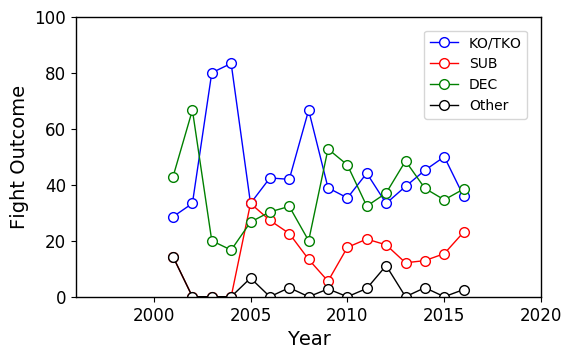

In [60]:
years = hw_outcome_by_year.index
plt.plot(years, 100 * hw_outcome_by_year['KO/TKO'] / hw_outcome_by_year.Total, label='KO/TKO', color='b', marker='o', mec='b',  mfc='w')
plt.plot(years, 100 * hw_outcome_by_year['Submission'] / hw_outcome_by_year.Total, label='SUB', color='r', marker='o', mec='r',  mfc='w')
plt.plot(years, 100 * hw_outcome_by_year['Decision'] / hw_outcome_by_year.Total, label='DEC', color='g', marker='o', mec='g',  mfc='w')
plt.plot(years, 100 * hw_outcome_by_year['Other'] / hw_outcome_by_year.Total, label='Other', color='k', marker='o', mec='k',  mfc='w')
plt.xlabel('Year')
plt.ylabel('Fight Outcome')
plt.legend()
plt.xlim(1996, 2020)
plt.ylim(0, 100)
plt.savefig('report/finishes/fight_outcome_breakdown_hw.pdf', bbox_inches='tight')